# Практическая работа №3: Статистический анализ социальных сетей.
Выполнил студент гр. 0382 Шангичев Василий. Вариант №49

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения
## Основные теоретические положения
* Диада $-$ элемент сети, представляющий собой пару акторов и связь между ними, либо её отсутствие 

$D_{ij}=(X_{ij}, X_{ji}), i\neq j$.

* Цензус диад — тройка чисел <M, A, N>, где:

$M = \sum_{i<j} X_{ij} X_{ji}$

$A = X_{++} - 2M$

$N = (^2_g) - A - M$

* Индекс взаимности Каца-Пауэлла — хар-ка измерения тенденции акторов в группе:

$-\infty < \rho_{кр} \leqslant 1$.

Индекс взаимности основан на ожидании кол-ва взаимн. диад, предполагая, что выбор делается акторами случайным образом.

Вероятность взаимного выбора между любой произвольной парой акторов равна

 $d^2/(g-1)^2$

Вероятность того, что общая диада является взаимной:

$p(i → j ∩ j → i) = \frac{d}{(g-1)}(\frac{d}{(g-1)} + p_{kp}\frac{g-1-d}{g-1})$

Оценка при свободном выборе 

$p_{ekp}$ = $\frac{2(g-1)M - gd^2}{gd(g-1-d)}$

Оценка при фиксированном выборе 

$p_{ekp}^\prime = \frac{2(g-1)^2M-L^2+L_2}{L(g-1)^2 -L^2 +L_2}$

* Индекс взаимности Бандиопадхьяйя — индекс, основанный на максимальной и минимальной значениях количества диад в сети. 

$\rho_B = \displaystyle{\frac{M - M_{\min}}{M_{\max} - M_{\min}}}.$

$M_{\min} = \max f(t)$, $0\leqslant t \leqslant g$

$M_{\max} = \lfloor\frac{1}{2}(\sum_{i=1}^gx_{i+}-\max_{0 \leqslant t \leqslant g}g(t))\rfloor$
, где 

$f(t)=\sum_{i=1}^tx_{i+}-t(g-1)-(^t_2)$

$g(t)=\sum_{i=1}^tx_{i+}-t(t-1)-\sum_{i=t+1}^g\min(t,x_{i+})$

* Нулевые гипотезы
 Для равномерного распределения

$H_0: L \sim B(g(g-1), \frac{1}{2})$

Статистика

$z_l = \frac{l - g(g-1)/2}{\sqrt{g(g-1)/4}}$ 

Для распределени Бернулли

$H_0 : L \sim B(g(g-1), P_0)$

Статистика

$z_l = \frac{l - g(g-1)P_0}{\sqrt{g(g-1)P_0(1-P_0)}}$

* Доверительный интервал

Оценка $P$

$P_{est} = \frac{\sum_{i=1}^g\sum_{j=1}^gx_{ij}}{g(g-1)}=\frac{l}{g(g-1)}$

Доверительный интервал:

$P_{lower} \leqslant P \leqslant P_{upper}$

$P_{lower} = P_{est} - Z_{\frac{α}{2}}\sqrt{P_{est}(1-P_{est})/g(g-1)} $

$P_{upper} = P_{est} + Z_{\frac{α}{2}}\sqrt{P_{est}(1-P_{est})/g(g-1)} $

Где $Z_{\frac{\alpha}{2}}: Ф(Z_{\frac{\alpha}{2}} = 0.5 - \frac{\alpha}{2})$

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать

## Выполнение работы

In [3]:
# Подключение библиотеки igraph
install.packages('igraph')
library(igraph)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [4]:
# инициализация констант
g <- 77
p <- 0.56
P0 <- 0.68
alpha <- 0.05

### 1)

In [5]:
random_graph <- erdos.renyi.game(g, p)

Описание модели см. в пункте "Основные теоретические положения".

### 2)

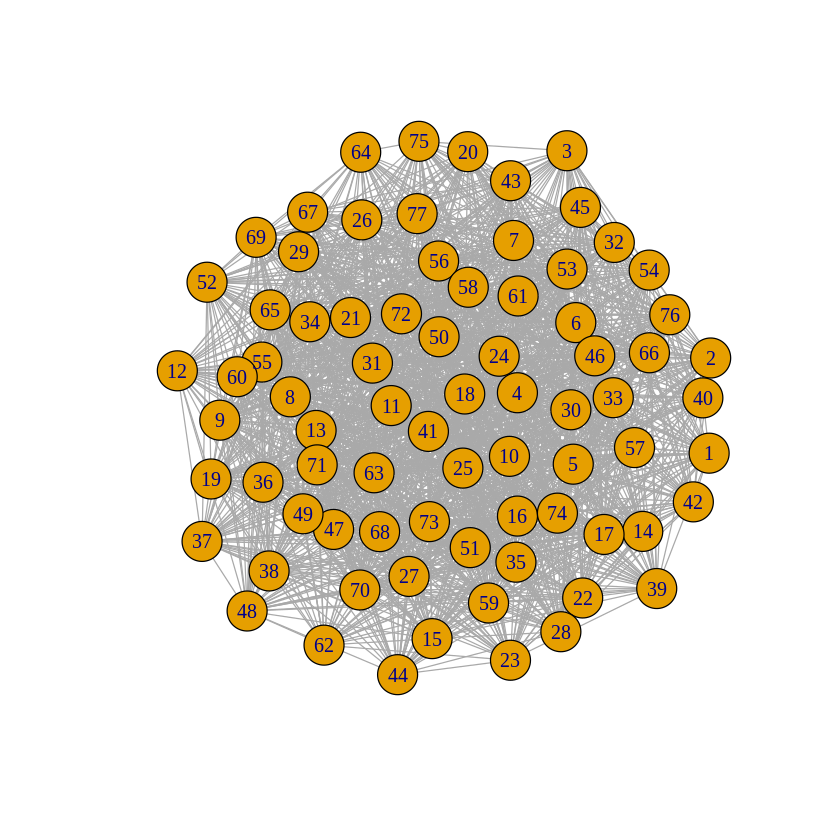

In [6]:
plot(random_graph)

### 3)

In [9]:
print(paste("Размер сети: ", gorder(random_graph)))
print(paste("Плотность сети: ", edge_density(random_graph)))
print(paste("Число компонент: ", count_components(random_graph)))
print(paste("Диаметр сети: ", diameter(random_graph)))
print(paste("Коэффициент кластеризации: ", transitivity(random_graph)))

[1] "Размер сети:  77"
[1] "Плотность сети:  0.566985645933014"
[1] "Число компонент:  1"
[1] "Диаметр сети:  2"
[1] "Коэффициент кластеризации:  0.570569338107301"


### 4)

In [10]:
dyad.census(random_graph)

$mut
[1] 1659

$asym
[1] 0

$null
[1] 1267

### Вывод: диад цензус посчитан был.

### 5)

In [15]:
# фиксированное количество выборов
d <- 20
M <- dyad.census(random_graph)$mut
fixed <- (((2 * (g - 1) * M) / (g * d)) - d) / (g - 1 - d)
fixed

[1] 2.566883

In [16]:
# свободный выбор
sociomatrix <- as.matrix(as_adjacency_matrix(random_graph))
row_sums <- sum(rowSums(sociomatrix) ^ 2) - sum(rowSums(sociomatrix)) ^ 2
liberty <- (2 * (g - 1) ^ 2 * M + row_sums) / (sum(rowSums(sociomatrix)) * (g - 1) ^ 2 + row_sums)
liberty

[1] 1

### Вывод: уровень образования связей при фиксированном количестве выборов гораздо выше, чем при свободном.

### 6)

In [17]:
# фиксированный выбор
(d / (g - 1) ^ 2) * (d * (1 - fixed) + (g - 1) * fixed)

[1] 0.5669856

In [18]:
# свободный
sum(rowSums(sociomatrix) * colSums(sociomatrix) / (g - 1) ^ 2) / g

[1] 0.325215

### 7)

In [21]:
getG <- function(sums, g, t){
  row_sums <- sum(sums[1:t])
  return(row_sums - t * (t - 1) - sum(pmin(rep(t, g - t), sums[(t+1):g])))
}

getF <- function(row_sum, g, t){
  s <- sum(row_sum[1:t])
  return(s - t * (g - 1) - factorial(t) / (factorial(2) * factorial(t - 2)))
}

In [22]:
rs <- rowSums(sociomatrix)
g_values <- rep(2, g - 1)
f_values <- rep(2, g)


for (t in 2:(g - 1)){
  g_values[t] <- getG(rs, g, t)
  f_values[t] <- getF(rs, g, t)
}

f_values[g] <- getF(rs, g, g)
(M - max(f_values)) / (floor(0.5 * sum(rs[1:g] - max(g_values))) - max(f_values))



[1] 1.048734

### Вывод: индекс взаимности равен примерно 1.049

### 8)

In [23]:
binom.test(sum(sociomatrix), g * (g - 1), p=0.5)


	Exact binomial test

data:  sum(sociomatrix) and g * (g - 1)
number of successes = 3318, number of trials = 5852, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.5541744 0.5797300
sample estimates:
probability of success 
             0.5669856 


### 9)


In [24]:
binom.test(sum(sociomatrix), g * (g - 1), p=P0)


	Exact binomial test

data:  sum(sociomatrix) and g * (g - 1)
number of successes = 3318, number of trials = 5852, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.68
95 percent confidence interval:
 0.5541744 0.5797300
sample estimates:
probability of success 
             0.5669856 


### В обоих случаях значение p-value больше уровня значимости, следовательно, обе гипотезы отвергнуты.

### 10)

In [36]:
estimation <- sum(sociomatrix) / (g * (g - 1))
l_value <- 0.5 - (1 - alpha) / 2
l_value

[1] 0.025

$z_{\frac{\alpha}{2}} \approx 0.065$

In [38]:
z_alpha <- 0.065
sub <- z_alpha * sqrt((estimation * (1 - estimation)) / (g * (g - 1)))
print(paste(estimation - sub, estimation + sub))

[1] "0.566564630150354 0.567406661715674"


С учетом получившегося ДИ можно сделать вывод, что для заданного значения $p$ был получен довольно маловероятный граф.

## Выводы
Была выполнена практическая работа номер 3, в ходе которой были освоены навыки статистического анализа сетей, которые могут быть полезны для нахождения закономерностей в реальных данных, которые могут быть полезны для построения гипотез, позволяющих построить математическую модель исследуемых процессов.